In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/42174_AI_Studio-yiming/Datasets/

/content/drive/MyDrive/42174_AI_Studio-yiming/Datasets


✅Decompression is complete and the files are decompressed to: /content/extracted
Total number of found images: 175767


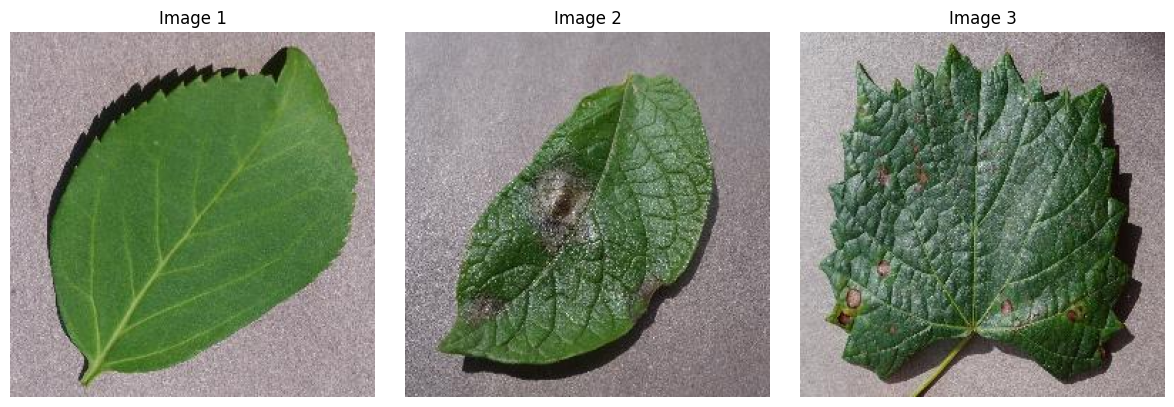

In [ ]:
import zipfile
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Setting the path
zip_path = '/content/drive/MyDrive/42174_AI_Studio-yiming/Datasets/archive.zip'
extract_path = "/content/extracted"

# Decompress the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅Decompression is complete and the files are decompressed to: {extract_path}")

# Search all image files (supports jpg, jpeg, png)
image_folder = extract_path
image_files = []
for root, dirs, files in os.walk(image_folder):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_files.append(os.path.join(root, file))

print(f"Total number of found images: {len(image_files)}")

# Randomly select 3 images
if image_files:
    selected_images = random.sample(image_files, min(3, len(image_files)))
    plt.figure(figsize=(12, 4))
    for i, img_path in enumerate(selected_images):
        img = Image.open(img_path)
        plt.subplot(1, 3, i+1)
        plt.imshow(img)
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Image file not found!")

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Rescaling

# The correct path
train_path = "/content/extracted/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"
val_path = "/content/extracted/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid"

img_size = (256, 256)
batch_size = 32

# Loading the training and validation sets
train_gen = image_dataset_from_directory(
    train_path,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

val_gen = image_dataset_from_directory(
    val_path,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

# Normalised pixel
rescale = Rescaling(1./255)
train_gen = train_gen.map(lambda x, y: (rescale(x), y))
val_gen = val_gen.map(lambda x, y: (rescale(x), y))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [ ]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(256, 256, 3)),
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(38, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 329,798 (1.26 MB)

 Trainable params: 329,798 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs
)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 388s 168ms/step - accuracy: 0.1237 - loss: 3.1822 - val_accuracy: 0.4376 - val_loss: 1.9710
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 398s 155ms/step - accuracy: 0.3832 - loss: 2.0771 - val_accuracy: 0.5769 - val_loss: 1.4621
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 384s 156ms/step - accuracy: 0.4990 - loss: 1.6671 - val_accuracy: 0.6592 - val_loss: 1.1439
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 383s 157ms/step - accuracy: 0.5855 - loss: 1.3555 - val_accuracy: 0.7280 - val_loss: 0.9173
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 382s 157ms/step - accuracy: 0.6424 - loss: 1.1595 - val_accuracy: 0.6993 - val_loss: 0.9861
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 345s 157ms/step - accuracy: 0.6831 - loss: 1.0273 - val_accuracy: 0.7940 - val_loss: 0.6684
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 344s 157ms/step - accuracy: 0.7157 - loss: 0.9154 - val_accuracy: 0.8079 - val_loss: 0.6247
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 366s 166ms/step - ac

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step

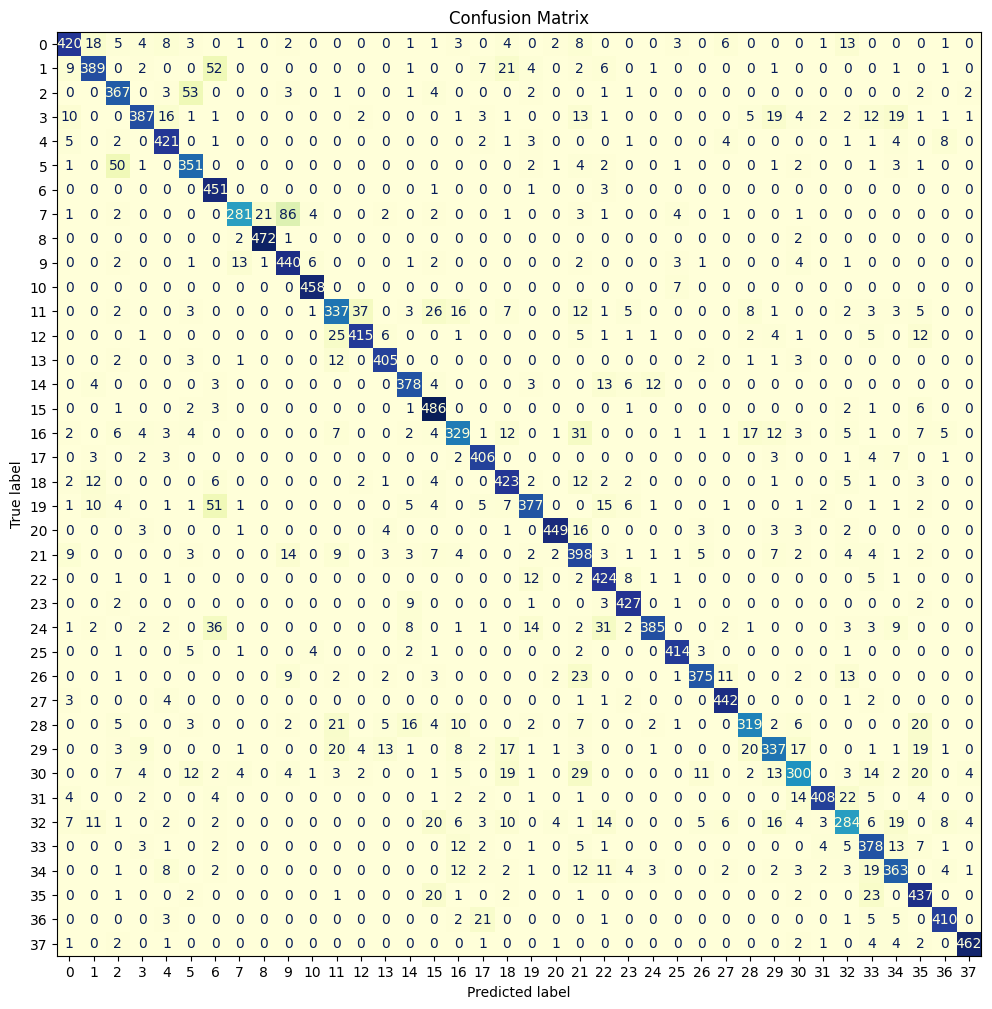

In [ ]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

# Generate predicted values and true labels
predictions = []
true_labels = []

for batch_x, batch_y in val_gen:
  preds = model.predict(batch_x)
  predictions.extend(np.argmax(preds, axis=1))
  true_labels.extend(batch_y.numpy())

# Output evaluation indicators
print("Accuracy : {:.2f}%".format(accuracy_score(true_labels, predictions) * 100))
print("Precision : {:.2f}%".format(precision_score(true_labels, predictions, average='micro') * 100))
print("Recall : {:.2f}%".format(recall_score(true_labels, predictions, average='micro') * 100))

# Confusion matrix
cm = confusion_matrix(true_labels, predictions)
fig, ax = plt.subplots(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax, cmap='YlGnBu', colorbar=False)
plt.title("Confusion Matrix")
plt.show()

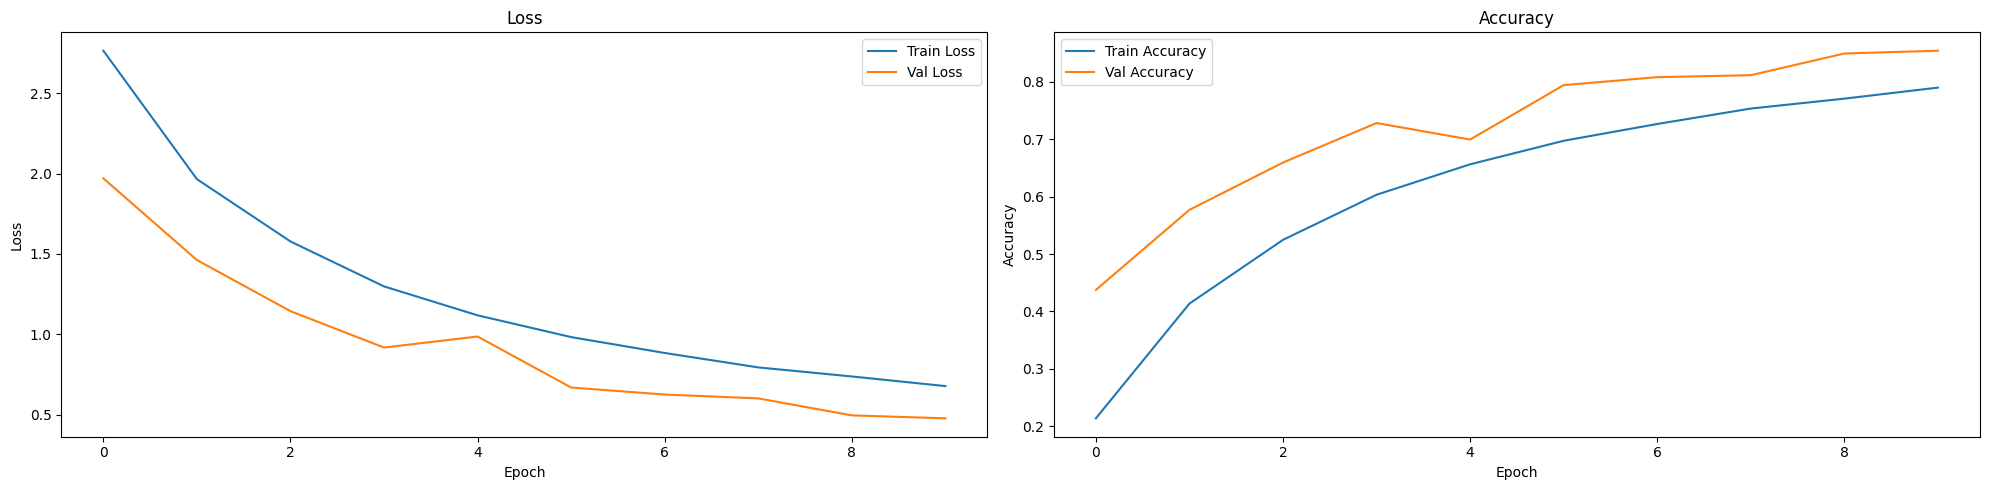

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

✅The model is saved！
Classification report：
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.88      0.83      0.86       504
                                 Apple___Black_rot       0.87      0.78      0.82       497
                          Apple___Cedar_apple_rust       0.78      0.83      0.81       440
                                   Apple___healthy       0.91      0.77      0.84       502
                               Blueberry___healthy       0.88      0.93      0.90       454
          Cherry_(including_sour)___Powdery_mildew       0.79      0.83      0.81       421
                 Cherry_(including_sour)___healthy       0.73      0.99      0.84       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.69      0.78       410
                       Corn_(maize)___Common_rust_       0.96      0.99      0.97       477
               Corn_(maize)___North

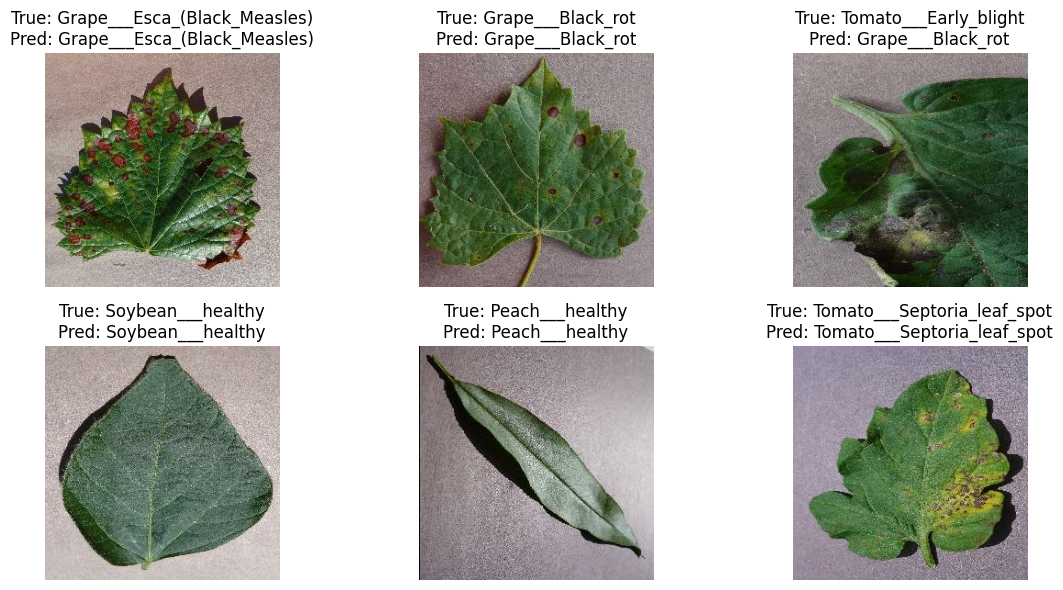

In [ ]:
# Save model
model.save("model_resnet50_trained.h5")
print("✅The model is saved！")

# Print classification report
from sklearn.metrics import classification_report
import os

# Class name
class_dirs = [d for d in os.listdir(val_path) if os.path.isdir(os.path.join(val_path, d))]
class_names = sorted(class_dirs)  # Alphabetical order

print("Classification report：")
print(classification_report(true_labels, predictions, target_names=class_names))

# Displays the predicted image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Create a new small dataset for visualisation
viz_dataset = tf.keras.utils.image_dataset_from_directory(
    val_path,
    image_size=img_size,
    batch_size=6,
    shuffle=True
)

# Standardising images
rescale = Rescaling(1./255)
viz_dataset = viz_dataset.map(lambda x, y: (rescale(x), y))

# Get some data
for images, labels in viz_dataset.take(1):
    # Predicted results
    predictions_batch = model.predict(images)
    predicted_classes = np.argmax(predictions_batch, axis=1)

    # Display of images and predicted results
    plt.figure(figsize=(12, 6))
    for i in range(min(6, len(images))):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i])
        true_class = class_names[labels[i]]
        predicted_class = class_names[predicted_classes[i]]
        title = f"True: {true_class}\nPred: {predicted_class}"
        plt.title(title)
        plt.axis("off")
    plt.tight_layout()
    plt.show()